<a href="https://colab.research.google.com/github/NathanielJames97/Porfolio/blob/main/Intro_into_PyTorch_Workalong_020322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision torchaudio


In [2]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0510, 0.6861, 0.7060],
        [0.1883, 0.3722, 0.3614],
        [0.5716, 0.8233, 0.8476],
        [0.3998, 0.3949, 0.4455],
        [0.6616, 0.8422, 0.3544]])


In [3]:
import torch
import torchvision
from torchvision import transforms, datasets


In [7]:
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train= False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))


In [8]:
#Break down the data into batches for better handling down the line#
#Not realistic to do all at once on gpu, also aids in generalisation#
#Batch size best fit between 8 - 64 , trial and errpr, usually bigger is better for training but could lose accuracy # 
# Shuffling data helps get best fit, give best oppurtunity to learn general principles, not little tricks #
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [9]:
#Now to iterate over our data #

for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0], data[1][0]

print(y)

tensor(4)


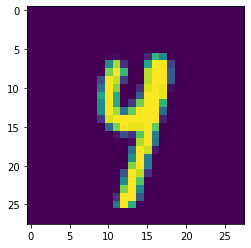

In [12]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

In [11]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [14]:
#How to balance data -> Important to stop model training itself into a hole

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total * 100}")

  #Shows how balanced the data is as a percentage

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
